In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import warnings
import itertools
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [2]:
octo = pd.read_excel('../data/raw/October 2018.xls')
nov = pd.read_excel('../data/raw/November 2018.xls')
dec = pd.read_excel('../data/raw/December 2018.xls')

In [3]:
dataset = pd.concat([octo, nov, dec], sort=False)
dataset.dropna(axis=0, how='all', thresh=10, inplace =True)
dataset.fillna("00:00", inplace =True)

In [4]:
dataset.head(10)

,Days,2019-10-01 00:00:00,2019-10-02 00:00:00,2019-10-03 00:00:00,2019-10-04 00:00:00,2019-10-05 00:00:00,2019-10-06 00:00:00,2019-10-07 00:00:00,2019-10-08 00:00:00,2019-10-09 00:00:00,...,2019-12-22 00:00:00,2019-12-23 00:00:00,2019-12-24 00:00:00,2019-12-25 00:00:00,2019-12-26 00:00:00,2019-12-27 00:00:00,2019-12-28 00:00:00,2019-12-29 00:00:00,2019-12-30 00:00:00,2019-12-31 00:00:00
1,In Time,00:00,00:00,10:07:02,00:00,10:14:32,00:00,00:00,10:06:35,09:11:21,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
2,Out Time,00:00,00:00,23:25:59,00:00,20:16:16,00:00,00:00,00:00,18:52:35,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
3,Duration,00:00,00:00,08:53,00:00,08:45,00:00,00:00,00:00,08:53,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
4,OT,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
5,T Duration,00:00,00:00,08:53,00:00,08:45,00:00,00:00,00:00,08:53,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
7,In Time,10:14:56,00:00,10:31:08,10:17:03,10:17:50,00:00,00:00,10:26:36,10:15:22,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
8,Out Time,19:11:25,00:00,19:24:19,19:14:05,19:18:56,00:00,00:00,19:09:48,19:14:26,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
9,Duration,08:45,00:00,08:29,08:43,08:42,00:00,00:00,08:33,08:45,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
10,OT,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00
11,T Duration,08:45,00:00,08:29,08:43,08:42,00:00,00:00,08:33,08:45,...,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00,00:00


In [5]:
# def presentEmployess(empTime):
# #     print(empTime.values)
#     p31 = np.asarray(empTime.values)
#     return (p31 != '00:00').sum()
# #     return list(filter(lambda x: 1 if (int(x.split(":")[0]) > 0 or int(x.split(":")[1]) > 0) else 0, empTime.values))
    

meltData = pd.melt(dataset, value_vars=dataset.columns.values[1:], id_vars=['Days'])
meltData.set_index("Days", inplace=True)
meltData.drop(["Out Time", "Duration", "OT", "T Duration"], inplace=True)
meltData.reset_index(inplace=True)
meltData["Attendance"] = meltData["value"].apply(lambda x: 1 if (int(x.split(":")[0]) > 0 or int(x.split(":")[1]) > 0) else 0)
meltData.drop(["Days", "value"], axis=1, inplace=True)
meltData = meltData.groupby("variable").sum().reset_index()
meltData.columns = ["Date", "Attendance"]
meltData["Date"] = meltData["Date"].apply(lambda x: x.replace(year=2018))
meltData.set_index(["Date"], inplace=True)

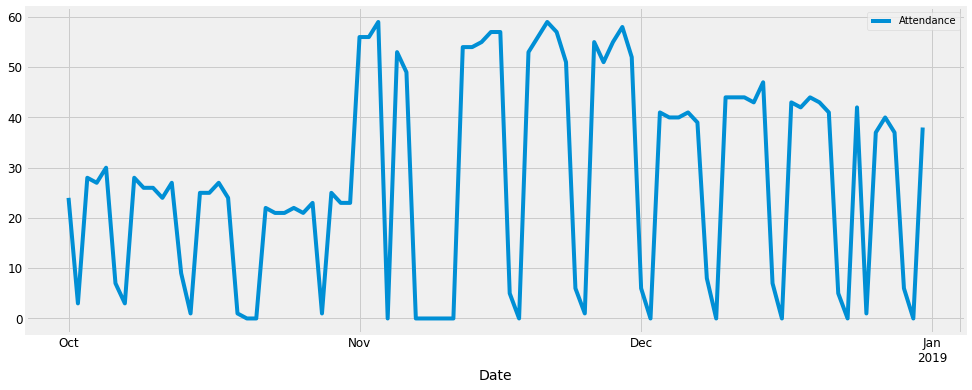

In [6]:
sampleData = meltData.resample("W-MON").sum()
meltData.plot(figsize=(15, 6))
plt.show()

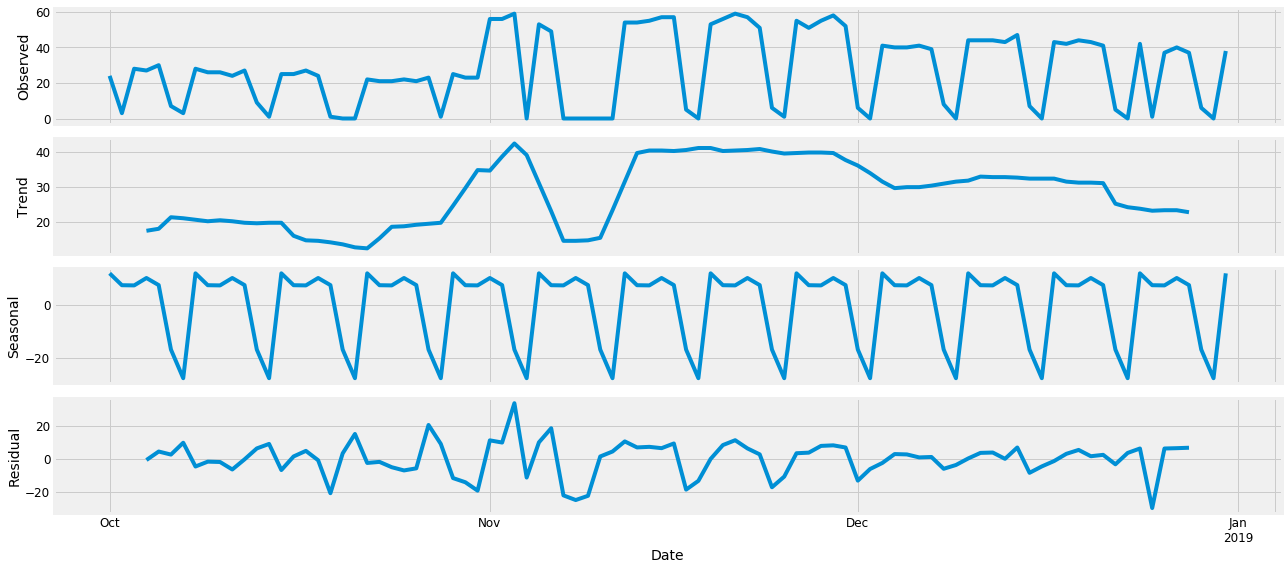

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(meltData, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(meltData, order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = mod.fit()
            
            print('ARIMA {} x {} 12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
#             print("hi")
            continue
            

c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (0, 0, 0, 12) 12 - AIC:904.6259744355485
ARIMA (0, 0, 0) x (0, 0, 1, 12) 12 - AIC:778.6912278858654
ARIMA (0, 0, 0) x (0, 1, 0, 12) 12 - AIC:777.1938938617405
ARIMA (0, 0, 0) x (0, 1, 1, 12) 12 - AIC:629.2468332138741
ARIMA (0, 0, 0) x (1, 0, 0, 12) 12 - AIC:770.9891401563137
ARIMA (0, 0, 0) x (1, 0, 1, 12) 12 - AIC:737.8711740163437
ARIMA (0, 0, 0) x (1, 1, 0, 12) 12 - AIC:655.8073976514911


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 1, 12) 12 - AIC:632.0943771353516
ARIMA (0, 0, 1) x (0, 0, 0, 12) 12 - AIC:839.7994519956158
ARIMA (0, 0, 1) x (0, 0, 1, 12) 12 - AIC:731.8433516975306
ARIMA (0, 0, 1) x (0, 1, 0, 12) 12 - AIC:748.2673638890279


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 1, 1, 12) 12 - AIC:607.3163692806357
ARIMA (0, 0, 1) x (1, 0, 0, 12) 12 - AIC:742.594467297876
ARIMA (0, 0, 1) x (1, 0, 1, 12) 12 - AIC:713.1930647322706


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 0, 12) 12 - AIC:639.107739342619
ARIMA (0, 0, 1) x (1, 1, 1, 12) 12 - AIC:610.2967749161261
ARIMA (0, 1, 0) x (0, 0, 0, 12) 12 - AIC:820.8190562417594


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 0, 1, 12) 12 - AIC:706.743515129777
ARIMA (0, 1, 0) x (0, 1, 0, 12) 12 - AIC:791.404284832657
ARIMA (0, 1, 0) x (0, 1, 1, 12) 12 - AIC:632.8150699675775
ARIMA (0, 1, 0) x (1, 0, 0, 12) 12 - AIC:718.7434451910086


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 0, 1, 12) 12 - AIC:708.499118811789
ARIMA (0, 1, 0) x (1, 1, 0, 12) 12 - AIC:651.8686700499302
ARIMA (0, 1, 0) x (1, 1, 1, 12) 12 - AIC:627.1292226065544


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 0, 0, 12) 12 - AIC:796.4453946069273
ARIMA (0, 1, 1) x (0, 0, 1, 12) 12 - AIC:691.1007373446324
ARIMA (0, 1, 1) x (0, 1, 0, 12) 12 - AIC:764.9196497635202


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12) 12 - AIC:613.4752997083368
ARIMA (0, 1, 1) x (1, 0, 0, 12) 12 - AIC:710.9656097244422
ARIMA (0, 1, 1) x (1, 0, 1, 12) 12 - AIC:693.0973605559569


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12) 12 - AIC:653.5209450643783


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12) 12 - AIC:613.1320834269893
ARIMA (1, 0, 0) x (0, 0, 0, 12) 12 - AIC:821.4926631974485
ARIMA (1, 0, 0) x (0, 0, 1, 12) 12 - AIC:714.4398069415197
ARIMA (1, 0, 0) x (0, 1, 0, 12) 12 - AIC:770.200607486908


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (0, 1, 1, 12) 12 - AIC:619.7102241746782
ARIMA (1, 0, 0) x (1, 0, 0, 12) 12 - AIC:716.1908674773176
ARIMA (1, 0, 0) x (1, 0, 1, 12) 12 - AIC:716.3553292105779
ARIMA (1, 0, 0) x (1, 1, 0, 12) 12 - AIC:633.3341566502954


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 1, 12) 12 - AIC:618.157119024227
ARIMA (1, 0, 1) x (0, 0, 0, 12) 12 - AIC:814.0587963682061
ARIMA (1, 0, 1) x (0, 0, 1, 12) 12 - AIC:703.1086695612005


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 0, 12) 12 - AIC:746.9679838255357
ARIMA (1, 0, 1) x (0, 1, 1, 12) 12 - AIC:609.3135413939915


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 0, 12) 12 - AIC:715.0822335221724
ARIMA (1, 0, 1) x (1, 0, 1, 12) 12 - AIC:705.046096791767


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 0, 12) 12 - AIC:631.9811767531774


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 1, 12) 12 - AIC:610.8427480714328
ARIMA (1, 1, 0) x (0, 0, 0, 12) 12 - AIC:820.4407634525688
ARIMA (1, 1, 0) x (0, 0, 1, 12) 12 - AIC:704.2679577466365
ARIMA (1, 1, 0) x (0, 1, 0, 12) 12 - AIC:792.8797738604418


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12) 12 - AIC:633.9276121214023
ARIMA (1, 1, 0) x (1, 0, 0, 12) 12 - AIC:708.1977914164339
ARIMA (1, 1, 0) x (1, 0, 1, 12) 12 - AIC:706.0558979772331
ARIMA (1, 1, 0) x (1, 1, 0, 12) 12 - AIC:644.6860881971136


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12) 12 - AIC:626.5400583705486
ARIMA (1, 1, 1) x (0, 0, 0, 12) 12 - AIC:786.965604990254
ARIMA (1, 1, 1) x (0, 0, 1, 12) 12 - AIC:681.4243987889157


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 0, 12) 12 - AIC:757.8642849551507


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12) 12 - AIC:607.0989401244973
ARIMA (1, 1, 1) x (1, 0, 0, 12) 12 - AIC:693.5850466864152


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12) 12 - AIC:683.3569583057497


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12) 12 - AIC:629.3655574219479


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12) 12 - AIC:604.8650449360189


In [10]:
mod = sm.tsa.statespace.SARIMAX(meltData,
                               orders=(1,1,1),
                               seasonal_order=(1, 1, 1, 12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4790      0.143      3.347      0.001       0.198       0.760
ar.S.L12      -0.3899      0.182     -2.140      0.032      -0.747      -0.033
ma.S.L12      -1.0000   8289.184     -0.000      1.000   -1.62e+04    1.62e+04
sigma2       380.3996   3.15e+06      0.000      1.000   -6.18e+06    6.18e+06


c:\users\lokesh\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [11]:
# results.plot_diagnostics(figsize=(16, 8))
# plt.show()

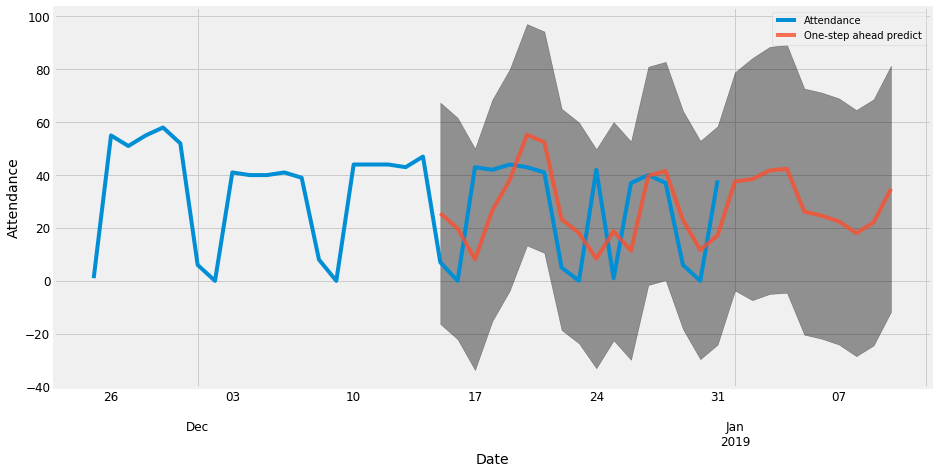

In [14]:
pred = results.get_prediction(start=pd.to_datetime('2018-12-15'), end=pd.to_datetime('2019-01-10'), dynamic=False)
pred_ci = pred.conf_int()

ax = meltData['2018-11-25':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead predict', alpha=.8, figsize=(14, 7))

ax.fill_between(pred_ci.index,  pred_ci.iloc[:, 0],  pred_ci.iloc[:, 1], color='k', alpha=.4)
ax.set_xlabel('Date')
ax.set_ylabel('Attendance')
plt.legend()
plt.show()

In [15]:
pred_ci

,lower Attendance,upper Attendance
2018-12-15,-16.320555,67.422653
2018-12-16,-22.097939,61.645242
2018-12-17,-33.731391,50.011764
2018-12-18,-15.216988,68.526069
2018-12-19,-3.779673,79.962963
2018-12-20,13.384164,97.124951
2018-12-21,10.571248,94.303915
2018-12-22,-18.609762,65.087225
2018-12-23,-23.646022,59.893873
2018-12-24,-33.075222,49.766899


In [97]:
# meltData.loc["2018-12-10" :]

In [89]:
# help(results.get_prediction)

In [88]:
# meltData.loc["2018-12-01":]

In [135]:
meltData.index

DatetimeIndex(['2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10', '2018-10-11', '2018-10-12',
               '2018-10-13', '2018-10-14', '2018-10-15', '2018-10-16',
               '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-20',
               '2018-10-21', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-27', '2018-10-28',
               '2018-10-29', '2018-10-30', '2018-10-31', '2018-11-01',
               '2018-11-02', '2018-11-03', '2018-11-04', '2018-11-05',
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15', '2018-11-16', '2018-11-17',
               '2018-11-18', '2018-11-19', '2018-11-20', '2018-11-21',
               '2018-11-22', '2018-11-23', '2018-11-24', '2018-11-25',
      

In [4]:
!pip install scipy

  Using cached https://files.pythonhosted.org/packages/c4/0f/2bdeab43db2b4a75863863bf7eddda8920b031b0a70494fd2665c73c9aec/scipy-1.2.0-cp36-cp36m-win_amd64.whl
